# Project: Salary Disparities and Trends (A Comprehensive Analysis of 2021 Data)
## BY 
### Bright Ihechukwu Enwere

## Table of Content

+ Introduction
+ Data Wrangling
+ Exploratory Analysis
+ Insights
+ Recommendatiom

## Introduction

### Dataset Description 
The dataset, titled "Ask a Manager Salary Survey 2021 (Responses)," is a real-world collection of survey data featuring 17 variables focused on salaries and workplace demographics. Sourced from AskAManager.org, the data primarily reflects responses from the United States, with additional inputs from international participants. 

+ 'Gender' tells us the gender of workers.
+ 'Industry' tells us the industry of the workers.
+ 'Age Groups' tells us the age group of the workers.
+ 'Work Year Experience' tells us the year of experince of the workers.
+ 'Location (Country, State, City)' tells us the location of workers.
+ 'Salary' tells us the Annual salary of workers.
+ 'Education' tells us the highest Education qualifications of workers.
+ 'Monetary compensation' tells us the bonuses or overtime in an average year.
+ 'Race' tells us the race of the workers.
+ 'Job Title' tells us the job title of the workers.

### Question(s) for Analysis

+ How does age group influences salary?
+ Which industry pay the most?
+ Which Educational Qualification earns the most salary?
+ What is the most popular industry?
+ How does education level vary by gender?
+ How do factors like education level influence with salary?
+ How do work year experience influences salary?


In [121]:
##Importing the packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

> In this section, we would try to point out instances and occurences in the dataset that might need some cleaning and wrangling. To do this we would proceed by first loading the dataset into the workspace and then assessing it to have a first view of what the data look like.



In [123]:
#loading the data using pandas read_csv function
#We would refer to the variable where the dataframe is loaded into as 'med_apt' to denote medical appointment and better
#reflect the content of the dataframe

df = pd.read_csv('Ask A Manager Salary Survey 2021.csv', encoding = 'latin-1')
pd.options.mode.chained_assignment = None 
df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,Master's degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,5-7 years,College degree,Non-binary,White,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the cell above, we can tell that the dataset contains 28199 rows and 24 columns. We can also draw some insights into the wrangling and cleansing procedures we might adopt to make the dataset suitale for analysis. Before we proceed to wrangling, we need to need to format our column names for better readibility and accessibility

In [125]:
##The function df.columns helps us to see our column names
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [127]:
#rename is a function used to rename your columns
df.rename(columns={
    'Timestamp': 'year', 
    'How old are you?': 'age_group', 
    'What industry do you work in?': 'industry',
    'If your job title needs additional context, please clarify here:': 'other_job_context',  
    'What is your annual salary?(You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'monetary_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here:': 'other_currency',
    'If your income needs additional context, please provide it here:': 'additional_context_income', 
    'How many years of professional work experience do you have in your field?': 'work_year_experience',
    'What is your highest level of education completed?': 'education', 
    'What is your gender?': 'gender', 
    'What is your race? (Choose all that apply.)': 'race',
"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'salary',
 'If "Other," please indicate the currency here:':'another_currency', 'What country do you work in?' :'country',
    "If you're in the U.S., what state do you work in?" :'state', 'What city do you work in?':'city'}, inplace = True)


In [93]:
df

,year,age_group,industry,Job title,other_job_context,salary,monetary_compensation,currency,"If ""Other,"" please indicate the currency here:",additional_context_income,...,work_year_experience,education,gender,race,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,Master's degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,5-7 years,College degree,Non-binary,White,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,5-7 years,College degree,Woman,White,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#I used value_counts to assess columns like 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', and 'Unnamed: 23' 
#and the have no values or obseravations
df['Unnamed: 23'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28194   NaN
28195   NaN
28196   NaN
28197   NaN
28198   NaN
Name: Unnamed: 23, Length: 28199, dtype: float64>

In [131]:
#We would be asssessing other columns to know which column are not needed for our analysis
df.additional_context_income.value_counts		

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28194    NaN
28195    NaN
28196    NaN
28197    NaN
28198    NaN
Name: additional_context_income, Length: 28199, dtype: object>

In [133]:
#Dropping all the columns that are not needed for my analysis
df.drop(columns=['Unnamed: 18','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                 'additional_context_income', 'How many years of professional work experience do you have overall?'],
        inplace = True)
df

,year,age_group,industry,Job title,other_job_context,salary,monetary_compensation,currency,"If ""Other,"" please indicate the currency here:",country,state,city,work_year_experience,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,USA,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,US,South Carolina,Greenville,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#Using the strip function to remove spaces so i can drop the 'If "Other," please indicate the currency here:' column
df.columns = df.columns.str.strip()
df.drop(columns = 'If "Other," please indicate the currency here:', inplace = True)
df

,year,age_group,industry,Job title,other_job_context,salary,monetary_compensation,currency,country,state,city,work_year_experience,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,US,South Carolina,Greenville,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
#Assessing the year column to know why the data type is object
#The year column has 93 null values
df.year
df.year.head(15)
df.year.isnull().sum()
df.year.value_counts()

year
4/27/2021 11:05:17    5
4/27/2021 11:30:18    5
4/27/2021 12:25:20    5
4/27/2021 11:05:08    5
4/27/2021 11:56:18    5
                     ..
4/28/2021 3:34:48     1
4/28/2021 3:34:10     1
4/28/2021 3:33:06     1
4/28/2021 3:32:52     1
1/16/2025 10:00:47    1
Name: count, Length: 25323, dtype: int64

In [139]:
#changing the datatype of year column from str to datetime 
df.year = pd.to_datetime(df.year)
#Assessing my datasets again to begin my wrangling
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28199 entries, 0 to 28198
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   28106 non-null  datetime64[ns]
 1   age_group              28106 non-null  object        
 2   industry               28031 non-null  object        
 3   Job title              28105 non-null  object        
 4   other_job_context      7273 non-null   object        
 5   salary                 28106 non-null  object        
 6   monetary_compensation  20792 non-null  float64       
 7   currency               28106 non-null  object        
 8   country                28106 non-null  object        
 9   state                  23072 non-null  object        
 10  city                   28024 non-null  object        
 11  work_year_experience   28106 non-null  object        
 12  education              27883 non-null  object        
 13  g

In [141]:
#Indexing the row where the year column has null values
#All the rows have null values, so we are dropping them
df[df.year.isnull()]

,year,age_group,industry,Job title,other_job_context,salary,monetary_compensation,currency,country,state,city,work_year_experience,education,gender,race
28106,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28107,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28108,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28109,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28110,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28195,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28196,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28197,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
#we are dropping all the rows indexed 28106:28198 since they are null
df.drop(df.index[28106:28199], inplace = True)
#Still assessing our data to do more cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28106 entries, 0 to 28105
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   28106 non-null  datetime64[ns]
 1   age_group              28106 non-null  object        
 2   industry               28031 non-null  object        
 3   Job title              28105 non-null  object        
 4   other_job_context      7273 non-null   object        
 5   salary                 28106 non-null  object        
 6   monetary_compensation  20792 non-null  float64       
 7   currency               28106 non-null  object        
 8   country                28106 non-null  object        
 9   state                  23072 non-null  object        
 10  city                   28024 non-null  object        
 11  work_year_experience   28106 non-null  object        
 12  education              27883 non-null  object        
 13  g

In [145]:
#Using value count to aggregate age group column to b sure it is cleaned
df.age_group.value_counts()
#Resetting my index since i dropped some rows
df.reset_index(drop= True, inplace = True)
#There is 75 null values in industry column
df.industry.isnull().sum()
#We will index those null values to see the rows it affected
df[df.industry.isnull()]
#Replacing the spaces within my column name with an underscore
df.columns = df.columns.str.replace(' ', '_')
#changing my columns to lower case for east accessibility
df.columns = df.columns.str.lower()
#Droping another role that is not needed
df.drop(columns = 'other_job_context', axis =1, inplace = True)

In [115]:
df

,year,age_group,industry,job_title,salary,monetary_compensation,currency,country,state,city,work_year_experience,education,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,South Carolina,Greenville,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,2024-12-16 19:10:58,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,75000,NaN,USD,United Stares,New York,New York City,1 year or less,Master's degree,Woman,White
28102,2024-12-20 06:16:27,55-64,Government and Public Administration,HMRC Engagement Lead,25000,0.0,GBP,United Kingdom,NaN,Suffolk,2 - 4 years,Some college,Woman,White
28103,2024-12-29 23:50:26,25-34,Entertainment,Junior Editor,72800,NaN,USD,United States,California,Los Angeles,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White"
28104,2025-01-03 16:03:10,18-24,Engineering or Manufacturing,Applications Engineer,100000,21000.0,USD,USA,Texas,Dallas,1 year or less,Master's degree,Woman,White


In [149]:
#Assessing our salary column
df.salary
df.salary.head(10)
#Checking for null values and no null value so far
df.salary.isnull().sum()
#Aggregating the data using value.counts()
df.salary.value_counts()
#Removing the commas in our values from our salary column so that i can convert to float
df.salary = df.salary.str.replace(',', '').astype(float)
df.salary.value_counts()
#Using descriptive analysis to assess my data. salary is an important column and must treated properly
df.salary.mean()
df.salary.value_counts()
df.currency.value_counts()
#Handling the currency column and converting salary to USD
# Define major currencies
major_currencies = ['USD', 'CAD', 'GBP', 'EUR', 'AUD/NZD', 'CHF', 'SEK', 'JPY', 'ZAR', 'HKD']
# Group smaller currencies into "Other currencies"
df['currency'] = df['currency'].apply(lambda x: x if x in major_currencies else 'Other currencies')
# Define exchange rates (example rates, adjust as needed)
exchange_rates = {
    'USD': 1.0,
    'CAD': 0.70,
    'GBP': 1.23,
    'EUR': 1.1,
    'AUD/NZD': 0.73,
    'CHF': 1.10,
    'SEK': 0.091,
    'JPY': 0.0064,
    'ZAR': 0.054,
    'HKD': 0.13,
    'Other currencies': 0.2141 
}
# creating a separate column converted_salary Convert salaries to USD
df['converted_salary'] = df.apply(
    lambda row: row['salary'] * exchange_rates.get(row['currency'], 1) 
    if pd.notnull(row['salary']) else None, axis=1
)
#Dropping our salary column
df.drop('salary', axis=1, inplace = True)
#Renaming converted_salary to salary
df.rename(columns = {'converted_salary':'salary'}, inplace = True)
#Converting the data type of our salary from float to int
df.salary = df.salary.astype(int)

#I Discovered an outlier in our salary column so i'm using IQR(InterQuartile Range) to handle it
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Filter the DataFrame to remove outliers
df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]


In [151]:
#Assessing monetary_compensation column
df.monetary_compensation
#changing the data type of monetary_compensation (from string to float)
df.monetary_compensation = pd.to_numeric(df.monetary_compensation) 
#Handling the monetary compensation column and converting to USD


# Convert monetary_compensation2 to USD
df['monetary_compensation2'] = df.apply(
    lambda row: row['monetary_compensation'] * exchange_rates.get(row['currency'], None) 
    if row['currency'] in exchange_rates else None, axis=1
)
#Confirming the conversion
df[['monetary_compensation2', 'monetary_compensation','currency']].head()
#dropping the monetary_compensation column
df.drop(columns = 'monetary_compensation', axis = 1, inplace = True)
#renaming my monetary_compensation2
df.rename(columns = {'monetary_compensation2':'monetary_compensation'}, inplace = True)
#filling the null in monetary compensation with the mean
df.monetary_compensation = df.monetary_compensation.fillna(df.monetary_compensation.mean())
#checking if there are still null
df.monetary_compensation.isnull().sum()
#change the data type from float to int
df.monetary_compensation = df.monetary_compensation.astype(int)


In [153]:
#Assessing and tyding the rows under industry
df.industry
df.industry.value_counts()
df[df['industry'] == 'Manufacturing : corporate admin support']
df.industry = df.industry.replace({'Computing or Tech': 'Science & tech', 'Education (Higher Education)':'Education',
                    'Government and Public Administration':'Public Administration', 'Nonprofits':'NGO', 'Accounting, Banking & Finance':'Banking & Finance',
                    'Regulatory Affairs- nutraceuticals':'Regulatory Affairs', 'Education (Primary/Secondary)':'Education',
                     'Manufacturing : corporate admin support':'corporate admin support'}) 
#Assessing my job_title column
df[df['job_title'] == 'Product communication and education specialist']
df.job_title = df.job_title.replace('Product communication and education specialist','Commuication specialist')
df

,year,age_group,industry,job_title,currency,country,state,city,work_year_experience,education,gender,race,salary,monetary_compensation
0,2021-04-27 11:02:10,25-34,Education,Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,Master's degree,Woman,White,55000,0
1,2021-04-27 11:02:22,25-34,Science & tech,Change & Internal Communications Manager,GBP,United Kingdom,NaN,Cambridge,5-7 years,College degree,Non-binary,White,67158,4920
2,2021-04-27 11:02:38,25-34,Banking & Finance,Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White,34000,8160
3,2021-04-27 11:02:41,25-34,NGO,Program Manager,USD,USA,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White,62000,3000
4,2021-04-27 11:02:42,25-34,Banking & Finance,Accounting Manager,USD,US,South Carolina,Greenville,5-7 years,College degree,Woman,White,60000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28099,2024-12-06 19:52:27,35-44,Public Administration,Station Commander,USD,United States,"Florida, Georgia","Tifton, Valdosta, Jacksonville",8 - 10 years,Master's degree,Man,White,70000,40000
28101,2024-12-16 19:10:58,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,USD,United Stares,New York,New York City,1 year or less,Master's degree,Woman,White,75000,8160
28102,2024-12-20 06:16:27,55-64,Public Administration,HMRC Engagement Lead,GBP,United Kingdom,NaN,Suffolk,2 - 4 years,Some college,Woman,White,30750,0
28103,2024-12-29 23:50:26,25-34,Entertainment,Junior Editor,USD,United States,California,Los Angeles,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",72800,8160


In [155]:
#Assessing my currency column
df.currency.value_counts()

#Assessing my country column by aggregation
df.country.value_counts()
df['country'] = df['country'].str.strip()
df[df['country'] == 'IS']
df.country = df.country.replace({'US':'United States', 'United Kingdomk':'United Kingdom', 'USA ':'United States', '?eská republika':'Czech Republic',
                    'United Stares ':'United States', 'IS':'United State'})
df.country = df.country.replace({'U.S.':'United States', 'UK': 'United Kingdom', ' New Zealand':'New Zealand', 'Australi':'Australia'})  
df.country.value_counts()
df['country'] = df['country'].replace({
    'Usa': 'United States',
    'United States of America': 'United States',
    'USA': 'United States',
    'United states': 'United States',
    'United statew': 'United States',
    'Wales (United Kingdom)': 'United Kingdom',
    "From Romania, but for an US based company": 'United States',
    'England, Gb': 'United Kingdom',
    "Cote d'Ivoire": 'Ivory Coast',
    'The US': 'United States',
    'U.S>': 'United States',
    'U.K': 'United Kingdom',
    'U.K. (northern England)': 'United Kingdom',
    'For the United States government, but posted overseas': 'United States',
    'Canad': 'Canada',
    'canada': 'Canada',
    'United State': 'United States',
    'America': 'United States',
    'us': 'United States',
    'United Statues': 'United States',
    'Great Britain': 'United Kingdom',
    'Untied  States': 'United States',
    'AUnited Statestralia': 'Australia',
    'Uk': 'United Kingdom',
    'united states of america': 'United States',
    'united states': 'United States',
    'ISA': 'United States',
    'USD': 'United States',
     'ARGENTINA BUT MY ORG IS IN THAILAND': 'Argentina',
    'Britain': 'United Kingdom',
    'Austria, but I work remotely for a Dutch/British company': 'Austria',
    'Brasil': 'Brazil',
    'Aotearoa New Zealand': 'New Zealand',
    'Canada, Ottawa, ontario': 'Canada',
    'Canadw': 'Canada',
    'CanadÃ¡': 'Canada',
    'Worldwide (based in US but short term trips aroudn the world)': 'United States',
    'Wales': 'United Kingdom',
    'Wales, UK': 'United Kingdom'
})



df.country.value_counts()

country
United States     21630
Canada             1672
United Kingdom     1295
Australia           381
Germany             187
                  ...  
Cuba                  1
Ivory Coast           1
Danmark               1
NL                    1
india                 1
Name: count, Length: 268, dtype: int64

In [157]:
#Checking for null values in my state columns
df[df.state.isnull()]

,year,age_group,industry,job_title,currency,country,state,city,work_year_experience,education,gender,race,salary,monetary_compensation
1,2021-04-27 11:02:22,25-34,Science & tech,Change & Internal Communications Manager,GBP,United Kingdom,NaN,Cambridge,5-7 years,College degree,Non-binary,White,67158,4920
10,2021-04-27 11:03:03,25-34,NGO,Office Manager,USD,United States,NaN,"Boston, MA",5-7 years,College degree,Woman,White,47500,0
14,2021-04-27 11:03:11,18-24,Health care,Patient care coordinator,CAD,Canada,NaN,Remote,1 year or less,College degree,Woman,White,22400,8160
15,2021-04-27 11:03:11,35-44,Utilities & Telecommunications,Quality And Compliance Specialist,GBP,United Kingdom,NaN,Lincoln,5-7 years,College degree,Man,White,29520,615
21,2021-04-27 11:03:24,35-44,NGO,Program Coordinator & Assistant Editor,USD,United States,NaN,Atlanta,2 - 4 years,PhD,Woman,White,50000,8160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28088,2024-11-07 15:36:52,18-24,Science & tech,Business Analyst,CAD,Canada,NaN,Kitchener,2 - 4 years,College degree,Woman,Black or African American,7000,3500
28089,2024-11-11 07:28:08,18-24,"Marketing, Advertising & PR",email marketing specialist,USD,india,NaN,chennai,2 - 4 years,NaN,Man,Asian or Asian American,4740,11
28096,2024-11-24 08:08:37,25-34,Business or Consulting,BI Consultant,Other currencies,India,NaN,Noida,2 - 4 years,College degree,Man,Another option not listed here or prefer not t...,2,8160
28098,2024-12-06 05:45:00,18-24,NaN,data engineer,USD,Morocco,NaN,Rabat,1 year or less,Master's degree,Man,White,0,8160


In [159]:
#Assessing my city columns
df.head(15)
df.city.value_counts()
#I want to pick the first index from city
df.city = df.city.str.split(',',expand = True)[0]
#Using value_counts to assess my city columns again
df.city.value_counts()

city
Boston            752
Chicago           719
New York          634
Seattle           630
Washington        610
                 ... 
Forest Hill         1
Mount Prospect      1
Phoenix/Tempe       1
Idaho  Falls        1
Rabat               1
Name: count, Length: 4380, dtype: int64

In [161]:
#Assessing my work_year_experience column
df.work_year_experience
df.work_year_experience.value_counts()
#Recategrized my rows
df.work_year_experience = df.work_year_experience.replace({'1 year or less':'0-1 year','41yearsormore':'41years+'})  
#Removing irregular spaces 
df.work_year_experience = df.work_year_experience.str.replace(' ', '')
df.work_year_experience.value_counts()

work_year_experience
5-7years         6355
2-4years         6171
11-20years       6099
8-10years        4769
21-30years       1664
0-1year          1476
31-40years        344
41yearsormore      40
Name: count, dtype: int64

In [167]:
#Assessing my education columns
df.education
df.education.value_counts()
#Recategorized my rows for better understanding
df.education = df.education.replace({'Some college':'College degree',
                                   'Professional degree (MD, JD, etc.)': 'Professional degree'})
#Addressing my gender colum
df.gender.value_counts()
df.gender.isnull().sum()
df.gender.value_counts()
#Recategorizing my gender column
df.gender = df.gender.replace('Other or prefer not to answer','no answer')
df.gender = df.gender.replace('Prefer not to answer', 'no answer')
#There are 171 null values in the gender column
#Assessing and adressing my race variables
df.race
#Aggregating my race column to assess it properly
df.race.value_counts()
df.race
#Recategorizing my race columns
# Create a dictionary to map original values to new standardized, shortened versions

df.race = df['race'].replace({
    'White':  'Monoracial',
    'Asian or Asian American': 'Biracial',
    'Black or African American': 'Biracial',
    'Hispanic, Latino, or Spanish origin': 'Multiracial',
    'Native American or Alaska Native': 'Biracial',
    'Middle Eastern or Northern African': 'Biracial',
    'Hispanic, Latino, or Spanish origin, White': 'Multiracial',
    'Asian or Asian American, White': 'Multiracial',
    'Black or African American, White': 'Multiracial',
    'Middle Eastern or Northern African, White': 'Biracial',
    'Middle Eastern or Northern African': 'Biracial',
    'Native American or Alaska Native, White': 'Multiracial',
    'White, Another option not listed here or prefer not to answer': 'Monoracial',
    'Native American or Alaska Native': 'Biracial',
    'Black or African American, Hispanic, Latino, or Spanish origin': 'Multiracial',
    'Asian or Asian American, Hispanic, Latino, or Spanish origin': 'Multiracial',
    'Asian or Asian American, Hispanic, Latino, or Spanish origin, White': 'Multiracial',
    'Black or African American, Hispanic, Latino, or Spanish origin, White': 'Multiracial',
    'Asian or Asian American, Another option not listed here or prefer not to answer': 'Biracial',
    'Hispanic, Latino, or Spanish origin, Native American or Alaska Native': 'Multiracial',
    'Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White': 'Multiracial',
    'Asian or Asian American, Black or African American': 'Biracial',
    'Asian or Asian American, Middle Eastern or Northern African': 'Biracial',
    'Asian or Asian American, Black or African American, White': 'Multiracial',
    'Black or African American, Native American or Alaska Native, White': 'Multiracial',
     'Asian or Asian American, White, Another option not listed here or prefer not to answer': 'Multiracial',
    'Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer': 'Multiracial',
    'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White': 'Multiracial',
    'Black or African American, Middle Eastern or Northern African, White': 'Multiracial',
    'Asian or Asian American, Native American or Alaska Native, White': 'Multiracial',
    'Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White': 'Multiracial',
    'Black or African American, Another option not listed here or prefer not to answer': 'Monoracial',
    'Black or African American, Middle Eastern or Northern African': 'Biracial',
    'Native American or Alaska Native, White, Another option not listed here or prefer not to answer': 'Biracial',
    'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African': 'Multiracial',
    'Middle Eastern or Northern African, White, Another option not listed here or prefer not to answer': 'Multiracial',
    'Black or African American, Native American or Alaska Native': 'Multiracial',
    'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, Native American or Alaska Native, White, Another option not listed here or prefer not to answer': 'Multiracial',
    'Asian or Asian American, Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer': 'Multiracial',
    'Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer': 'Multiracial',
    'Middle Eastern or Northern African, Native American or Alaska Native': 'Multiracial',
    'Asian or Asian American, Native American or Alaska Native': 'Multiracial',
    'Hispanic, Latino, or Spanish origin, Native American or Alaska Native, Another option not listed here or prefer not to answer': 'Multiracial',
    'Middle Eastern or Northern African, Native American or Alaska Native, White': 'Multiracial',
    'Asian or Asian American, Middle Eastern or Northern African, White': 'Multiracial',
    'Native American or Alaska Native, Another option not listed here or prefer not to answer': 'Biracial',
    'Asian or Asian American, Black or African American, Native American or Alaska Native, White': 'Mixed',
    'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin': 'Biracial',
    'Hispanic, Latino, or Spanish origin, White, Another option not listed here or prefer not to answer': 'Biracial',
    'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White': 'Multiracial',
    'Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White': 'Multiracial',
    'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native': 'Multiracial', 
    'Mixed':'Multiracial', 'Another option not listed here or prefer not to answer':'No answer'
})
df.race.value_counts()
    

race
Monoracial     22388
Biracial        2178
Multiracial     1605
No answer        578
Name: count, dtype: int64

In [171]:
#Assessing my datasets programmatically
df.info()
#Dropping all null values and state column
df = df.drop(columns = 'state', axis =1)

<class 'pandas.core.frame.DataFrame'>
Index: 26918 entries, 0 to 28104
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   26918 non-null  datetime64[ns]
 1   age_group              26918 non-null  object        
 2   industry               26846 non-null  object        
 3   job_title              26917 non-null  object        
 4   currency               26918 non-null  object        
 5   country                26918 non-null  object        
 6   state                  21993 non-null  object        
 7   city                   26841 non-null  object        
 8   work_year_experience   26918 non-null  object        
 9   education              26705 non-null  object        
 10  gender                 26754 non-null  object        
 11  race                   26749 non-null  object        
 12  salary                 26918 non-null  int32         
 13  moneta

In [173]:
#Dropping all null
df = df.dropna()
#resetting my index
df = df.reset_index(drop = True)
#Assessing my data and making sure is read for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26337 entries, 0 to 26336
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   26337 non-null  datetime64[ns]
 1   age_group              26337 non-null  object        
 2   industry               26337 non-null  object        
 3   job_title              26337 non-null  object        
 4   currency               26337 non-null  object        
 5   country                26337 non-null  object        
 6   city                   26337 non-null  object        
 7   work_year_experience   26337 non-null  object        
 8   education              26337 non-null  object        
 9   gender                 26337 non-null  object        
 10  race                   26337 non-null  object        
 11  salary                 26337 non-null  int32         
 12  monetary_compensation  26337 non-null  int32         
dtypes

In [175]:
#Exporting my cleaned datasets for further visualization in power bi
df.to_csv('Ask A Manager Salary Survey 2021-Cleaned.csv')


## Exploratory Analysis

### How does age group influences salary?

>> First we will use boxplot to visualize this and the barplot to dertime the average salary across different age groups

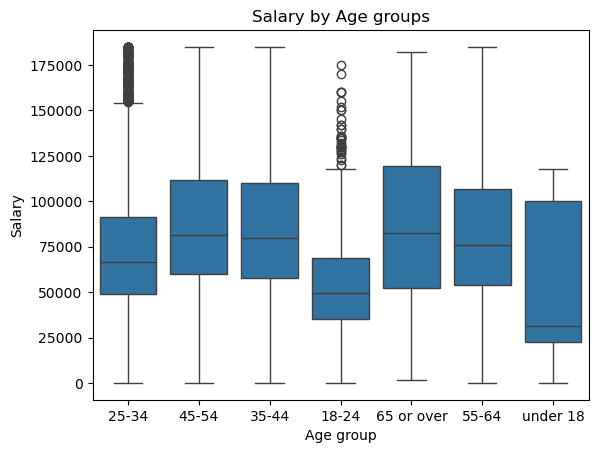

In [21]:
sns.boxplot(data =df, x = 'age_group', y ='salary')
plt.title('Salary by Age groups')
plt.xlabel('Age group')
plt.ylabel('Salary');

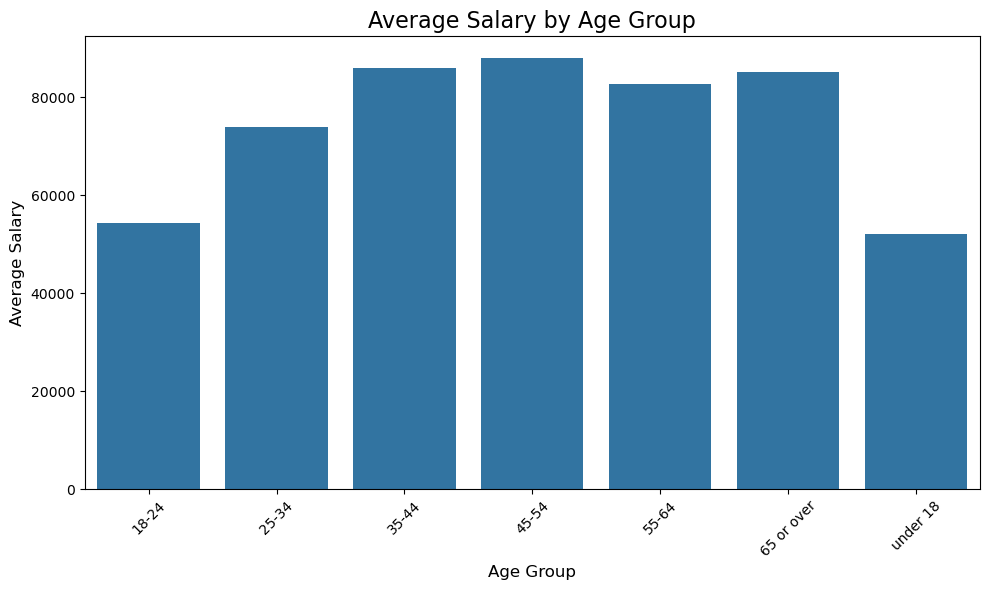

In [23]:
# Group by age group and calculate the mean salary
age_salary = df.groupby('age_group')['salary'].mean().sort_index()
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_salary.index, y=age_salary.values,hue=None)
plt.title('Average Salary by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>Th e 45-54 age group earns the highest average salary, suggesting that individuals in this group are at their peak earning potential.
The under 18 age group has the lowest average salary, which aligns with expectations, as younger individuals typically have less experience and may work part-time or in lower-paying jobs.

## Which industry pay the most?

> Using barlot we will show the highest salaries by industry

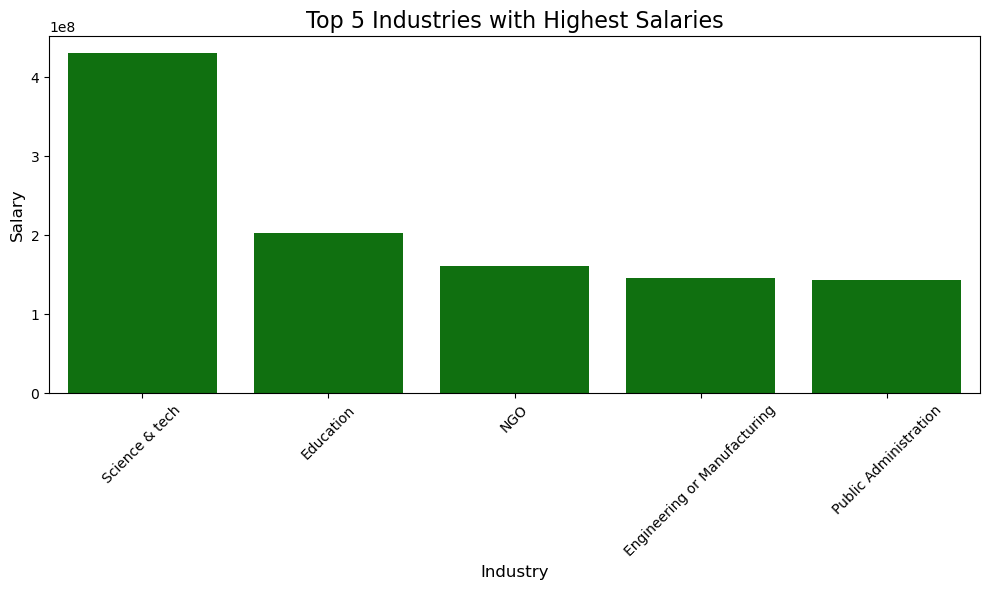

In [50]:
#Group by industry and calculate the average salary
top_industries = df.groupby('industry')['salary'].sum().sort_values(ascending=False).head(5)

#Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.index, y=top_industries.values, color = 'green')
plt.title('Top 5 Industries with Highest Salaries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> The science & Tech industrt has the highest salary and this makes it the most popular industries curremtly

## Which Educational Qualification earns the most salary?
> Using barplot we will show average salary by Education qualification.

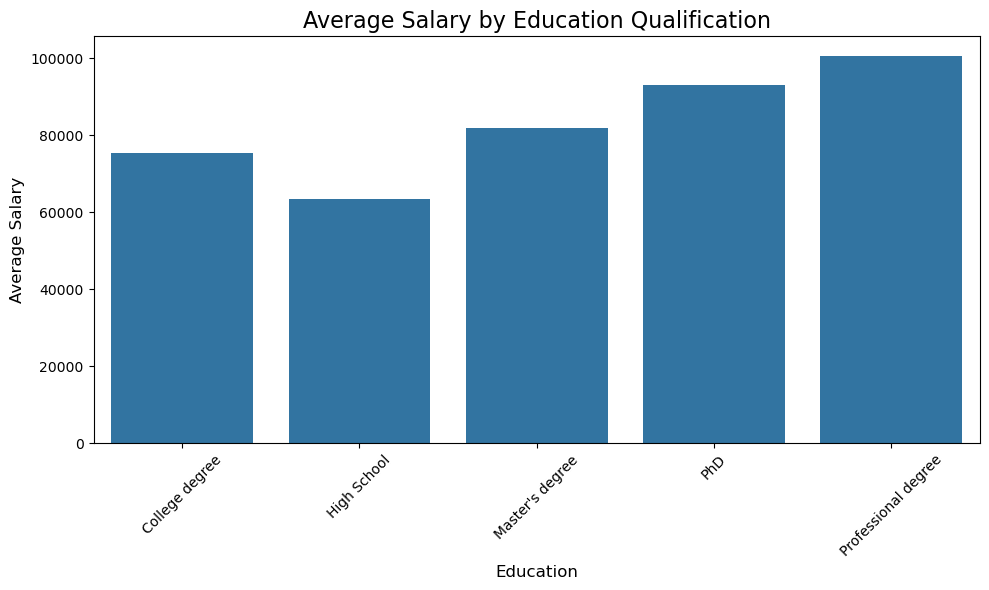

In [32]:
# Group by education and calculate the mean salary
education_salary = df.groupby('education')['salary'].mean().sort_index()
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_salary.index, y=education_salary.values,hue=None)
plt.title('Average Salary by Education Qualification', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> The Professional degree categories followed by PhD has the highest average salary, while high school certificate have the least average salary. > 

## How does education level vary by gender?

> We aim to show our Educational qualification varies by gender.
> Using counplot we want to show the distribution of gender across different Education qualification.


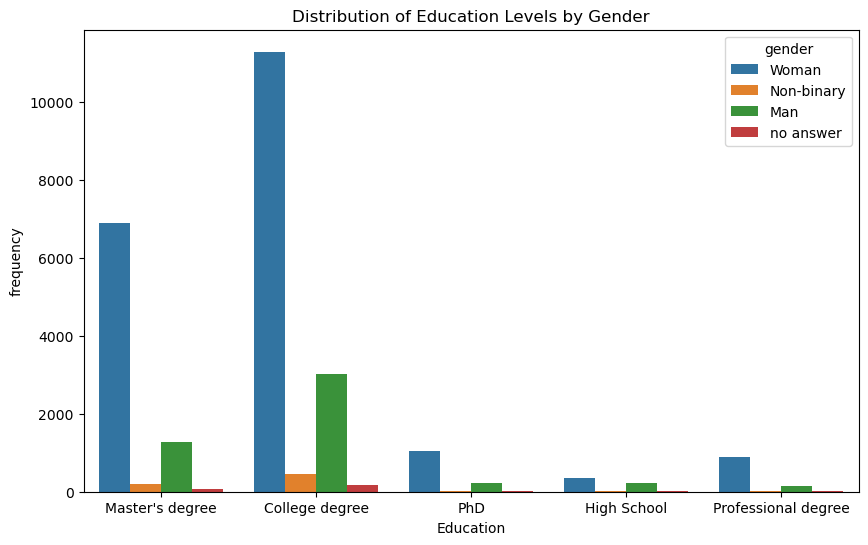

In [29]:
#Using counplot
plt.figure(figsize=(10, 6))
sns.countplot(data =df, x = 'education', hue = 'gender')
plt.title('Distribution of Education Levels by Gender')
plt.xlabel('Education')
plt.ylabel('frequency');

> The chart highlights the distribution of education levels by gender. Women and Men are the most represented across all education levels, with college degrees being the most common among both groups. Women dominate in the Master’s degree category, while men have a slightly higher presence in the PhD and professional degree categories. Non-binary individuals and those who did not disclose their gender make up a much smaller proportion across all education levels.

## How does work experience influences salary?

>Using Barplot we will visualize which industry pays more by average salary.

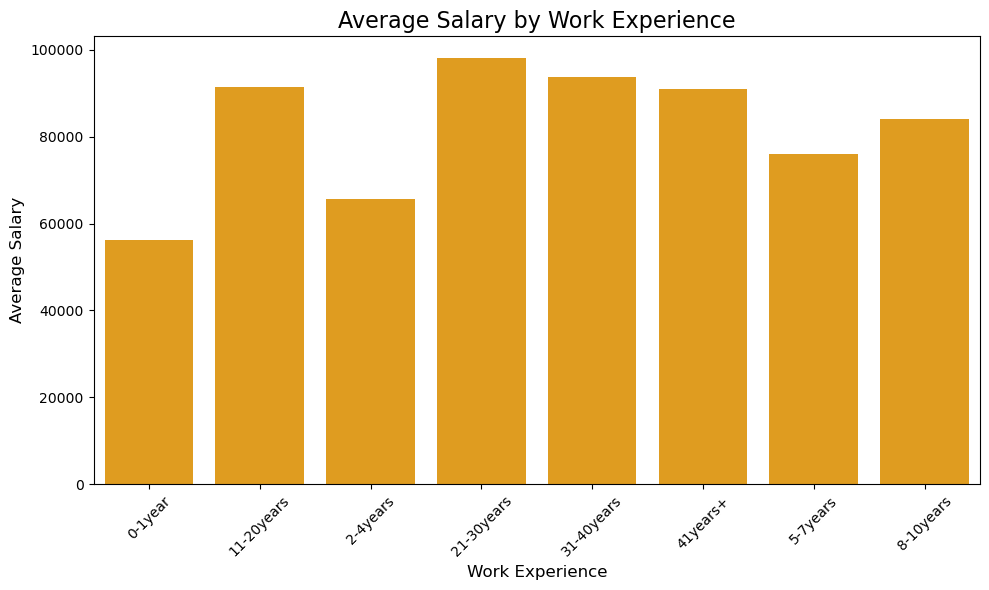

In [41]:
#Group by work year experience and calculate the average salary
work_experience_by_salary = df.groupby('work_year_experience')['salary'].mean()

#Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=work_experience_by_salary.index, y=work_experience_by_salary.values, color = 'orange')
plt.title('Average Salary by Work Experience', fontsize=16)
plt.xlabel('Work Experience', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> Individuals with 21-30 years of experience have the highest salaries, followed by those with 31-40 years of experience. This highlights that experience plays a crucial role in salary levels.
0-1 year of experience shows lower earnings, as expected for entry-level positions.
The slight decline in salary for 31-40 years of experience compared to 21-30 years could indicate that salaries plateau or decrease as individuals approach retirement.

##                       Insight
+ The survey datasets highlight a clear relationship between salary, age group, and work experience. The 45-54 age group earns the highest average salary, reflecting their peak earning potential, while the under 18 age group has the lowest, likely due to limited work experience and entry-level roles.
Similarly, work experience significantly impacts earnings, with those having 21-30 years of experience earning the most, followed by 31-40 years of experience. Interestingly, salary is likely to be influenced more by work experience than age. The slight decline in salary for the latter group may indicate that earnings begin to plateau or decrease as individuals approach retirement.

+ Individuals with Professional degrees have the highest average salaries, closely followed by those with PhDs, emphasizing the financial benefits of advanced education. In contrast, individuals with only a high school education earn the least on average, reflecting the influence of educational attainment on earning potential.
This trend highlights the significant role of higher education in unlocking better-paying opportunities, underscoring its value in career advancement and income growth.

+ There is gender imbalance in education levels, particularly in advanced degrees like PhDs and professional degrees, where men are more represented. However, women lead in the Master's degree category, suggesting their pursuit of higher education. The low representation of non-binary individuals and undisclosed gender groups across all education levels underscores the need for inclusivity and opportunities for these groups to bridge educational gaps. 

## Recommendation

+ Education and Salary: Individuals with higher educational qualifications, such as Professional degrees and PhDs, earn more on average. Encouraging and supporting individuals to pursue advanced education could improve earning potential. This is especially relevant for industries requiring specialized skills.

+ Work Experience and Salary: Salaries tend to peak between 21–30 years of work experience, suggesting the importance of consistent career progression and skill development. Employers should consider implementing mentorship and growth opportunities for employees to help them maximize their earning potential within this range.

+ Age and Salary: Salaries increase steadily across age groups, peaking around 45–54 years. Employers might consider leveraging the expertise of this group while also investing in younger employees to ensure a skilled workforce over time.

+ Industry Trends: The science and technology sector offers the highest salary opportunities, followed by education and NGOs. Individuals should be guided toward industries with higher earning potentials based on their skills and interests. Policymakers and educators might also emphasize STEM (Science, Technology, Engineering, and Math) education to prepare individuals for these lucrative fields.

+ Gender Representation: Efforts should be made to address gender gaps in high-paying industries and leadership roles to ensure equity and diversity. Programs to empower underrepresented groups to access better education and career opportunities would contribute to societal balance.